[View in Colaboratory](https://colab.research.google.com/github/JohnnyUrosevic/Machine-Learning-Shenanigans/blob/master/autoencoder_keras.ipynb)

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Import MNIST data
mnist = tf.keras.datasets.mnist

inputs = keras.Input(shape=(784,))

encoder = keras.layers.Dense(256, activation=tf.nn.leaky_relu)(inputs)
encoder = keras.layers.Dense(128, activation=tf.nn.leaky_relu)(encoder)
encoder = keras.layers.Dense(64, activation=tf.nn.leaky_relu)(encoder)
encoder = keras.layers.Dense(16, activation=tf.nn.leaky_relu)(encoder)


decoder = keras.layers.Dense(64, activation=tf.nn.leaky_relu, name="decoder1")(encoder)
decoder = keras.layers.Dense(128, activation=tf.nn.leaky_relu, name="decoder2")(decoder)
decoder = keras.layers.Dense(256, activation=tf.nn.leaky_relu, name="decoder3")(decoder)
predictions  = keras.layers.Dense(784, activation=tf.nn.sigmoid, name="predictions")(decoder)

model = keras.Model(inputs=inputs, outputs=predictions)

encoder_model = keras.Model(inputs=inputs, outputs=encoder)

encoded_input = keras.Input(shape=(16,))

decoder_layer1 = model.get_layer(name="decoder1")
decoder_layer2 = model.get_layer(name="decoder2")
decoder_layer3 = model.get_layer(name="decoder3")
decoded_layer = model.get_layer(name="predictions")

decoder_model = keras.Model(inputs=encoded_input, outputs=decoded_layer(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))


#Define training
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['mae'])

#import data into memory
(x_train, _),(x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
model.fit(x_train, x_train, epochs=20, batch_size=32)


Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1538 - mean_absolute_error: 0.0764
Epoch 2/20
53728/60000 [=========================>....] - ETA: 1s - loss: 0.1160 - mean_absolute_error: 0.0501

60000/60000 [==============================] - 17s 278us/step - loss: 0.1154 - mean_absolute_error: 0.0497
Epoch 3/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.1071 - mean_absolute_error: 0.0438
Epoch 4/20
15328/60000 [======>.......................] - ETA: 12s - loss: 0.1041 - mean_absolute_error: 0.0417

60000/60000 [==============================] - 17s 278us/step - loss: 0.1033 - mean_absolute_error: 0.0411
Epoch 5/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.1011 - mean_absolute_error: 0.0395
Epoch 6/20
 3808/60000 [>.............................] - ETA: 15s - loss: 0.0988 - mean_absolute_error: 0.0381

60000/60000 [==============================] - 17s 277us/step - loss: 0.0996 - mean_absolute_error: 0.0385
Epoch 7/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0984 - mean_absolute_error: 0.0377
Epoch 8/20
  416/60000 [..............................] - ETA: 17s - loss: 0.0974 - mean_absolute_error: 0.0372

60000/60000 [==============================] - 17s 281us/step - loss: 0.0975 - mean_absolute_error: 0.0370
Epoch 9/20
59584/60000 [============================>.] - ETA: 0s - loss: 0.0968 - mean_absolute_error: 0.0365

60000/60000 [==============================] - 17s 281us/step - loss: 0.0968 - mean_absolute_error: 0.0365
Epoch 10/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0962 - mean_absolute_error: 0.0361
Epoch 11/20
17152/60000 [=======>......................] - ETA: 11s - loss: 0.0956 - mean_absolute_error: 0.0358

60000/60000 [==============================] - 17s 279us/step - loss: 0.0957 - mean_absolute_error: 0.0357
Epoch 12/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0952 - mean_absolute_error: 0.0354
Epoch 13/20
 4000/60000 [=>............................] - ETA: 16s - loss: 0.0947 - mean_absolute_error: 0.0351

60000/60000 [==============================] - 17s 284us/step - loss: 0.0948 - mean_absolute_error: 0.0351
Epoch 14/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0944 - mean_absolute_error: 0.0349
Epoch 15/20
  416/60000 [..............................] - ETA: 16s - loss: 0.0941 - mean_absolute_error: 0.0349

60000/60000 [==============================] - 17s 281us/step - loss: 0.0941 - mean_absolute_error: 0.0346
Epoch 16/20
59456/60000 [============================>.] - ETA: 0s - loss: 0.0938 - mean_absolute_error: 0.0344

60000/60000 [==============================] - 17s 281us/step - loss: 0.0938 - mean_absolute_error: 0.0344
Epoch 17/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0935 - mean_absolute_error: 0.0342
Epoch 18/20
16800/60000 [=======>......................] - ETA: 12s - loss: 0.0933 - mean_absolute_error: 0.0341

60000/60000 [==============================] - 17s 281us/step - loss: 0.0933 - mean_absolute_error: 0.0341
Epoch 19/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0931 - mean_absolute_error: 0.0339
Epoch 20/20
 4032/60000 [=>............................] - ETA: 15s - loss: 0.0928 - mean_absolute_error: 0.0337

60000/60000 [==============================] - 17s 283us/step - loss: 0.0929 - mean_absolute_error: 0.0338


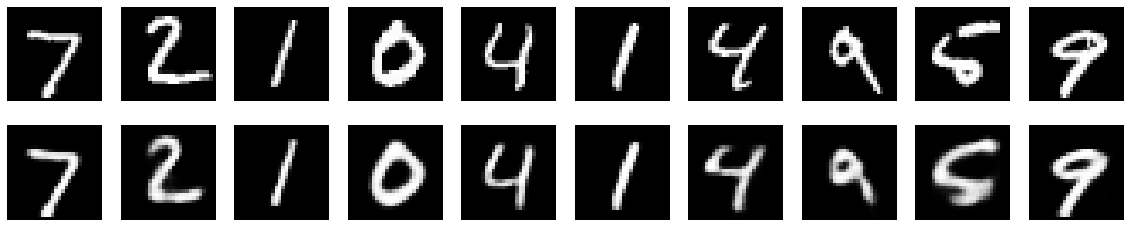

In [37]:
decoded_imgs = model.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[6.0172625  2.3057396  1.5657487  0.58819115 1.4372793  6.8459187
 1.4281791  0.13125375 4.080515   2.8944273  1.1310444  2.62506
 3.1937304  2.9984148  2.8758643  2.2476857 ]


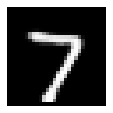

In [38]:
#test encoder
encoded_img = encoder_model.predict(x_test)[0]
print(encoded_img)

#test decoder
decoded_img = decoder_model.predict(encoded_img.reshape(-1, 16))[0]

plt.figure(figsize=(20, 4))
ax = plt.subplot(2, 1, 1)
plt.imshow(decoded_img.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [42]:
#save model
!mkdir /tmp/keras
model.save('/tmp/keras/model.h5')

mkdir: cannot create directory ‘/tmp/keras’: File exists


In [43]:
filename = "keras" #@param {type:"string"}
folders_or_files_to_save = "/tmp/keras" #@param {type:"string"}
from google.colab import files
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

def save_file_to_drive(name, path):
    file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
    }

    media = MediaFileUpload(path, 
                  mimetype='application/octet-stream',
                  resumable=True)

    created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

    print('File ID: {}'.format(created.get('id')))

    return created


extension_zip = ".zip"

zip_file = filename + extension_zip

# !rm -rf $zip_file
!zip -r $zip_file {folders_or_files_to_save} # FOLDERS TO SAVE INTO ZIP FILE

auth.authenticate_user()
drive_service = build('drive', 'v3')

destination_name = zip_file
path_to_file = zip_file
save_file_to_drive(destination_name, path_to_file)

File ID: 1mQ4lIs1Ot2Qfd9loJHHAEU0OWOxF9SEd


{'id': '1mQ4lIs1Ot2Qfd9loJHHAEU0OWOxF9SEd'}